In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = [0.9, 2.7, 6.7, 10.9, 6.0, 6.3, 7.0, 8.7, 4.8, 12.5, 
     13.4, 2.0, 3.6, 14.6]
y = [0.5, 1.1, 28.6, 32.8, 15.7, 19, 32.6, 32.3, 7.3, 33.1, 
     32.9, 0.75, 3.6, 33]

In [4]:
val = pd.DataFrame({'x':x, 'y':y})
val = val.sort_values(by='x')
val

,x,y
0,0.9,0.50
11,2.0,0.75
1,2.7,1.10
12,3.6,3.60
8,4.8,7.30
4,6.0,15.70
5,6.3,19.00
2,6.7,28.60
6,7.0,32.60
7,8.7,32.30


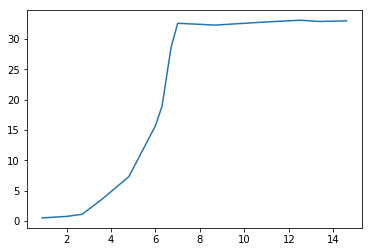

In [5]:
plt.plot(val['x'], val['y'])

In [6]:
val.describe()

,x,y
count,14.000000,14.000000
mean,7.150000,19.517857
std,4.345068,14.167618
min,0.900000,0.500000
25%,3.900000,4.525000
50%,6.500000,23.800000
75%,10.350000,32.750000
max,14.600000,33.100000


## World Development Indicators

In [7]:
import random

In [8]:
data = pd.read_csv('./Week5-Visualization/world-development-indicators/Indicators.csv')

In [9]:
data.head(5)
data.shape

(5656458, 6)

In [10]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [11]:
countries = data['CountryCode'].unique().tolist()
len(countries)

247

In [12]:
countryCodes = data['CountryName'].unique().tolist()
len(countryCodes)
type(data['CountryName'].unique())

numpy.ndarray

In [13]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [14]:
years = data['Year'].unique().tolist()
len(years)

56

In [15]:
print(min(years), max(years))

1960 2015


## Basic Plotting in Matplotlib: Part 1

In [16]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [17]:
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

stage = data[mask1 & mask2]

In [18]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


In [19]:
#dir(pd.Series)

In [20]:
years = stage['Year'].values
co2 = stage['Value'].values

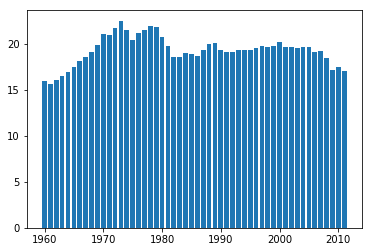

In [21]:
plt.bar(years, co2)
plt.show()

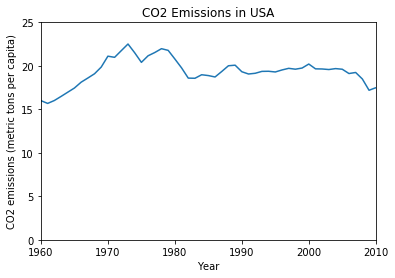

In [22]:
plt.plot(years, co2)
plt.xlabel('Year')
plt.ylabel(stage.IndicatorName.iloc[0])
plt.title('CO2 Emissions in USA')
plt.axis([1960,2010,0,25])
plt.show()

In [23]:
stage.IndicatorName.iloc[0]

'CO2 emissions (metric tons per capita)'

In [24]:
help(pd.DataFrame.loc)

Help on property:

    Purely label-location based indexer for selection by label.
    
    ``.loc[]`` is primarily label based, but may also be used with a
    boolean array.
    
    Allowed inputs are:
    
    - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
      interpreted as a *label* of the index, and **never** as an
      integer position along the index).
    - A list or array of labels, e.g. ``['a', 'b', 'c']``.
    - A slice object with labels, e.g. ``'a':'f'`` (note that contrary
      to usual python slices, **both** the start and the stop are included!).
    - A boolean array.
    - A ``callable`` function with one argument (the calling Series, DataFrame
      or Panel) and that returns valid output for indexing (one of the above)
    
    ``.loc`` will raise a ``KeyError`` when the items are not found.
    
    See more at :ref:`Selection by Label <indexing.label>`



In [25]:
hist_data = stage['Value'].values
print(len(hist_data))

52


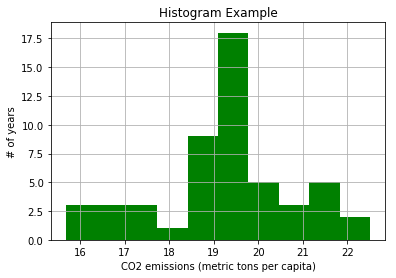

In [26]:
plt.hist(hist_data, 10, normed=False, facecolor='green')
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of years')
plt.title('Histogram Example')
plt.grid(True)
plt.show()

In [27]:
#help(pd.Series.isin)

In [28]:
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

co2_2011 = data[mask1 & mask2]
co2_2011.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131


In [29]:
m1 = co2_2011[['CountryCode','Value']].sort_values(by=['Value'])
m1.head(3)

,CountryCode,Value
5069955,BDI,0.021350
5075305,TCD,0.043830
5079628,ZAR,0.050303


In [30]:
#help(pd.DataFrame.sort_values)
mm = co2_2011.sort_values(by=['Value'])
mm = mm.reset_index()
usa_loc = mm.loc[mm.CountryCode=='USA']
#usa_loc = mm.loc[mm.CountryCode=='USA'].reset_index().index
usa_loc

,index,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
221,5194727,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,17.020216


In [31]:
len(mm)

232

In [32]:
len(data)

5656458

(array([136.,  57.,  22.,   7.,   5.,   2.,   1.,   0.,   1.,   1.]),
 array([2.13499261e-02, 4.42110757e+00, 8.82086521e+00, 1.32206229e+01,
        1.76203805e+01, 2.20201381e+01, 2.64198958e+01, 3.08196534e+01,
        3.52194111e+01, 3.96191687e+01, 4.40189264e+01]),
 <a list of 10 Patch objects>)

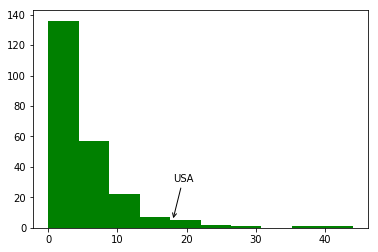

In [33]:
fig, ax = plt.subplots()
ax.annotate("USA",
           xy=(18,5), xycoords='data',
           xytext=(18,30), textcoords='data',
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="arc3"),
           )
plt.hist(co2_2011['Value'],10,normed=False, facecolor='green')

In [34]:
#help(plt.subplots)

In [35]:
help(ax.annotate)

Help on method annotate in module matplotlib.axes._axes:

annotate(*args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Annotate the point ``xy`` with text ``s``.
    
    Additional kwargs are passed to `~matplotlib.text.Text`.
    
    Parameters
    ----------
    
    s : str
        The text of the annotation
    
    xy : iterable
        Length 2 sequence specifying the *(x,y)* point to annotate
    
    xytext : iterable, optional
        Length 2 sequence specifying the *(x,y)* to place the text
        at.  If None, defaults to ``xy``.
    
    xycoords : str, Artist, Transform, callable or tuple, optional
    
        The coordinate system that ``xy`` is given in.
    
        For a `str` the allowed values are:
    
        =================   ===============================================
        Property            Description
        =================   ===============================================
        'figure points'     points from the l

## Basic 2

In [36]:
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

gdp_stage = data[mask1 & mask2]

In [37]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


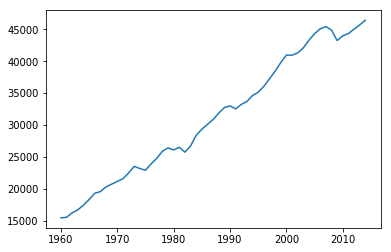

In [38]:
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

In [39]:
print("GDP min year = ", gdp_stage['Year'].min(), 'max: ', 
      gdp_stage['Year'].max())

GDP min year =  1960 max:  2014


In [40]:
gdp_stage_trunc = gdp_stage[gdp_stage.Year < 2012]
print(len(gdp_stage_trunc))

52


In [41]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`.
    
    Marker size is scaled by `s` and marker color is mapped to `c`.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an arra

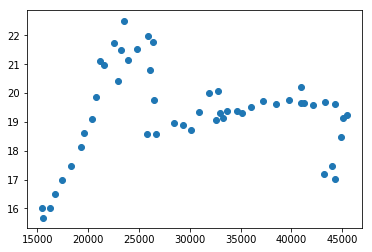

In [42]:
plt.scatter(gdp_stage_trunc['Value'].values, stage['Value'].values)

In [43]:
np.corrcoef(gdp_stage_trunc['Value'], stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

In [44]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [48]:
n1 =data[data.IndicatorName.str.contains("GDP per capita")].IndicatorName.unique()
n1

array(['GDP per capita (current US$)',
       'GDP per capita (constant 2005 US$)',
       'GDP per capita (current LCU)', 'GDP per capita (constant LCU)',
       'GDP per capita growth (annual %)',
       'Government expenditure per secondary student as % of GDP per capita (%)',
       'Government expenditure per primary student as % of GDP per capita (%)',
       'Government expenditure per tertiary student as % of GDP per capita (%)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GDP per capita, PPP (current international $)'], dtype=object)

In [50]:
len(n1)

10